Fan Bu
Gold 3

# HW3: Exploratory Analysis
For this homework, we will be applying the concepts from today's class to the [Credit Application Dataset](http://archive.ics.uci.edu/ml/datasets/Credit+Approval) from the UCI machine learning repository. 

This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. 

This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

I've created a list of arbitrary column names below, with the assumption that A16 represents whether or not the credit application was approved. 

## 1. Load the dataset
Download the [dataset](http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data) to your computer and update the file location in the pd.read_csv() function below: 

In [1]:
import pandas as pd
import numpy as np

# read in the data
names = [("A" + str(x+1)) for x in range(0,16)] # generate list of column names
df = (pd.read_csv('crx.data', 
                 header=None,
                 names=names)
        .replace({'?': np.nan}))  # here we are automatically replace question marks with np.nan

In [2]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## 2. Find and repleace null values
The easiest way to check each column for null values is to use the following statement: 

In [3]:
df.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

We can use the following syntax to pull out rows that contain any null values: 

In [4]:
df[df.isnull().any(axis=1)]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,NaN,0,-
83,a,NaN,3.500,u,g,d,v,3.000,t,f,0,t,g,00300,0,-
86,b,NaN,0.375,u,g,d,v,0.875,t,f,0,t,s,00928,0,-
92,b,NaN,5.000,y,p,aa,v,8.500,t,f,0,f,g,00000,0,-
97,b,NaN,0.500,u,g,c,bb,0.835,t,f,0,t,s,00320,0,-
202,b,24.83,2.750,u,g,c,v,2.250,t,t,6,f,g,NaN,600,+
206,a,71.58,0.000,NaN,NaN,NaN,NaN,0.000,f,f,0,f,p,NaN,0,+
243,a,18.75,7.500,u,g,q,v,2.710,t,t,5,f,g,NaN,26726,+
248,NaN,24.50,12.750,u,g,c,bb,4.750,t,t,2,f,g,00073,444,+
254,b,NaN,0.625,u,g,k,v,0.250,f,f,0,f,g,00380,2010,-


Examine the rows and remove the null values from each column in an appropriate way. 

For example, let's look at the unique vaues in A4. There appears to be two categorical values and the number 1.

In [5]:
df.A4.unique()

array(['u', 'y', nan, 'l'], dtype=object)

The simplest way to replace null values in categorical data is to fillna() with the most frequent column value, so that you are not changing the columns frequency distribution: 

In [6]:
df.A4.value_counts()

u    519
y    163
l      2
Name: A4, dtype: int64

In [7]:
df["A4"] = df.A4.fillna("u")

replace nulls from each column

In [8]:
df.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

In [9]:
#A1
df.A1.value_counts()

b    468
a    210
Name: A1, dtype: int64

In [10]:
df["A1"] = df.A1.fillna("b")

In [11]:
#A2
df["A2"] = df.A2.astype(float)

In [12]:
a2_mean= df["A2"].mean()
print(a2_mean)

31.56817109144546


In [13]:
df["A2"] = df.A2.fillna(a2_mean)
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [14]:
#A5
df.A5.value_counts()

g     519
p     163
gg      2
Name: A5, dtype: int64

In [15]:
df["A5"] = df.A5.fillna("g")

In [16]:
#A6
df.A6.value_counts()

c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
x      38
m      38
d      30
e      25
j      10
r       3
Name: A6, dtype: int64

In [17]:
df["A6"] = df.A6.fillna("c")

In [18]:
#A7
df.A7.value_counts()

v     399
h     138
bb     59
ff     57
j       8
z       8
dd      6
n       4
o       2
Name: A7, dtype: int64

In [19]:
df["A7"] = df.A7.fillna("v")

In [20]:
#A14
df.A14.value_counts()

00000    132
00200     35
00120     35
00160     34
00100     30
00080     30
00280     22
00180     18
00140     16
00240     14
00320     14
00300     13
00260     11
00400      9
00060      9
00220      9
00340      7
00360      7
00380      5
00440      4
00040      4
00420      4
00070      4
00520      4
00232      4
00108      4
00132      4
00144      4
00128      3
00181      3
        ... 
00454      1
00094      1
00231      1
00221      1
00515      1
00056      1
00349      1
00491      1
00028      1
00292      1
00311      1
00348      1
00431      1
00141      1
00224      1
00523      1
00416      1
00052      1
00093      1
00075      1
00550      1
00510      1
00309      1
00393      1
00395      1
00170      1
00422      1
00371      1
00202      1
00372      1
Name: A14, Length: 170, dtype: int64

In [21]:
df["A14"] = df.A14.fillna("00000")

In [22]:
#check null values again
df.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

## 3. One-hot encode the A16 column
A16 contains the class labels, which are the target for the dataframe. These can be one-hot-encoded so that: 
- "-" = 0
- "+" = 1

This would allow us to use this information in a regression, or other machine learning model. 

In [23]:
df.loc[df.A16 == "-", 'A16'] = 0
df.loc[df.A16 == "+", 'A16'] = 1
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,1


In [24]:
df.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,0
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,0


In [25]:
dfhot = pd.get_dummies(df,columns=['A16'])
dfhot.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16_0,A16_1
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,1,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,1,0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,1,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,1,0
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,1,0


## 4. Standardize the Dataset
We can see that several of the columns are on different scales. 

In [26]:
#get the data types for each column
df.dtypes
#A2,3,8,11,15 are numeric columns

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

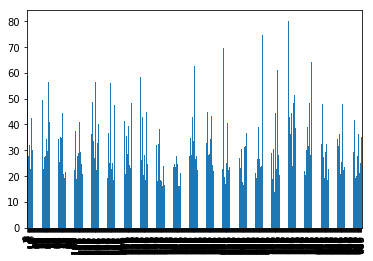

In [27]:
# create a density plot to view the distribution of each numeric column
#A2
%matplotlib inline
df.A2.plot(kind="bar")

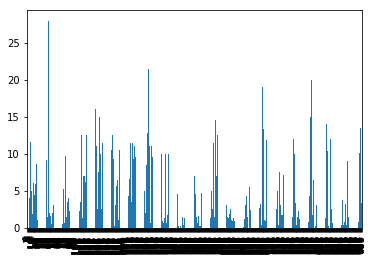

In [28]:
#A3
df.A3.plot(kind="bar")

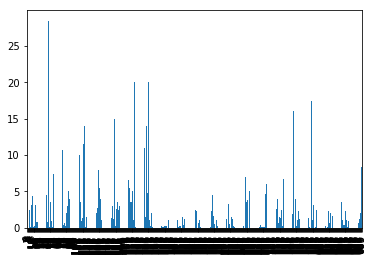

In [29]:
#A8
df.A8.plot(kind="bar")

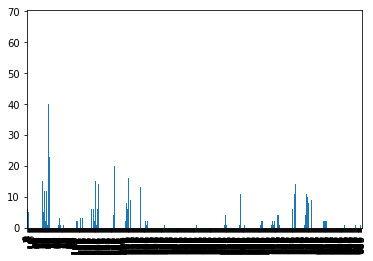

In [30]:
#A11
df.A11.plot(kind="bar")

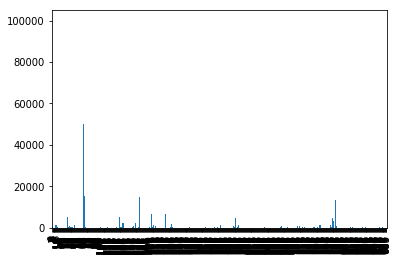

In [31]:
#A15
df.A15.plot(kind="bar")

In [32]:
# standardize each numeric using either Zscore or MinMax, according to the columns distribution
from sklearn import preprocessing 
#A2 is close to normal distribution
#the rest should use min-max

In [33]:
# change A11, A15 from INT64 to float
df["A11"] = df.A11.astype(float)
df["A15"] = df.A15.astype(float)
df.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float64
A12     object
A13     object
A14     object
A15    float64
A16     object
dtype: object

In [34]:
#A2-z score
standard_scaler = preprocessing.StandardScaler()

In [35]:
 df[["A2"]] = standard_scaler.fit_transform(df[["A2"]])
    

In [36]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,-0.062321,0.000,u,g,w,v,1.25,t,t,1.0,f,g,00202,0.0,1
1,a,2.288101,4.460,u,g,q,h,3.04,t,t,6.0,f,g,00043,560.0,1
2,a,-0.596738,0.500,u,g,q,h,1.50,t,f,0.0,f,g,00280,824.0,1
3,b,-0.315599,1.540,u,g,w,v,3.75,t,t,5.0,t,g,00100,3.0,1
4,b,-0.962303,5.625,u,g,w,v,1.71,t,f,0.0,f,s,00120,0.0,1


In [37]:
from sklearn.preprocessing import MinMaxScaler
#resource used  https://stackoverflow.com/questions/43834242/sklearn-minmaxscaler-scale-specific-columns-only
#for columns A3,A8,A11,A15

In [38]:
 mms = MinMaxScaler()

In [39]:
df[['A3','A8','A11','A15']] = mms.fit_transform(df[['A3','A8','A11','A15']])

In [40]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,-0.062321,0.000000,u,g,w,v,0.043860,t,t,0.014925,f,g,00202,0.00000,1
1,a,2.288101,0.159286,u,g,q,h,0.106667,t,t,0.089552,f,g,00043,0.00560,1
2,a,-0.596738,0.017857,u,g,q,h,0.052632,t,f,0.000000,f,g,00280,0.00824,1
3,b,-0.315599,0.055000,u,g,w,v,0.131579,t,t,0.074627,t,g,00100,0.00003,1
4,b,-0.962303,0.200893,u,g,w,v,0.060000,t,f,0.000000,f,s,00120,0.00000,1


## 5. Apply these methods on our own dataset, as appropriate
Where appropriate, apply each of these methods on your own dataset and plot the results. 

In [41]:
air_path = "./AirQuality.csv"
air = pd.read_csv(air_path, sep=",", header=0)
air.head()

,MeasureId,MeasureName,MeasureType,StratificationLevel,StateFips,StateName,CountyFips,CountyName,ReportYear,Value,Unit,UnitName,DataOrigin,MonitorOnly
0,85,Percent of days with PM2.5 levels over the Nat...,Percent,State x County,1,Alabama,1119,Sumter,1999,6.250000,%,Percent,Monitor Only,1
1,85,Percent of days with PM2.5 levels over the Nat...,Percent,State x County,1,Alabama,1127,Walker,1999,7.954545,%,Percent,Monitor Only,1
2,85,Percent of days with PM2.5 levels over the Nat...,Percent,State x County,1,Alabama,1121,Talladega,1999,15.533981,%,Percent,Monitor Only,1
3,85,Percent of days with PM2.5 levels over the Nat...,Percent,State x County,1,Alabama,1101,Montgomery,1999,7.142857,%,Percent,Monitor Only,1
4,85,Percent of days with PM2.5 levels over the Nat...,Percent,State x County,1,Alabama,1117,Shelby,1999,4.878049,%,Percent,Monitor Only,1


In [42]:
air.dtypes

MeasureId                int64
MeasureName             object
MeasureType             object
StratificationLevel     object
StateFips                int64
StateName               object
CountyFips               int64
CountyName              object
ReportYear               int64
Value                  float64
Unit                    object
UnitName                object
DataOrigin              object
MonitorOnly              int64
dtype: object

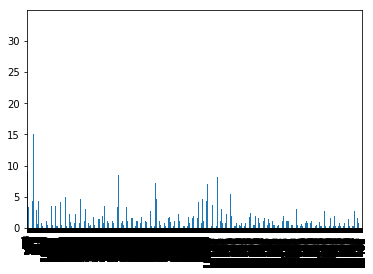

In [43]:
#can standarlize "Value" column

air.Value.plot(kind="bar")
#unable to create plot, used Tableau instead, observed it's not a normal distribution 

In [44]:
#use min-max
air[['Value']] = mms.fit_transform(air[['Value']])

In [45]:
air.head()

,MeasureId,MeasureName,MeasureType,StratificationLevel,StateFips,StateName,CountyFips,CountyName,ReportYear,Value,Unit,UnitName,DataOrigin,MonitorOnly
0,85,Percent of days with PM2.5 levels over the Nat...,Percent,State x County,1,Alabama,1119,Sumter,1999,0.181337,%,Percent,Monitor Only,1
1,85,Percent of days with PM2.5 levels over the Nat...,Percent,State x County,1,Alabama,1127,Walker,1999,0.233054,%,Percent,Monitor Only,1
2,85,Percent of days with PM2.5 levels over the Nat...,Percent,State x County,1,Alabama,1121,Talladega,1999,0.463017,%,Percent,Monitor Only,1
3,85,Percent of days with PM2.5 levels over the Nat...,Percent,State x County,1,Alabama,1101,Montgomery,1999,0.208427,%,Percent,Monitor Only,1
4,85,Percent of days with PM2.5 levels over the Nat...,Percent,State x County,1,Alabama,1117,Shelby,1999,0.139712,%,Percent,Monitor Only,1


## 6. For two points, let us know what you would like feedback on, or have any questions about!

My plot for my own data set took really long to create, is there a better way to get graphs for large data sets?